Goes back to root folder

In [1]:
%cd ../..

/home/alexandre/Documents/projects/deepwalk-node2vec-comparison


In [4]:
from os.path import join

import numpy as np
import matplotlib.pyplot as plt

from node_embeddings.model import deepWalk
from node_embeddings.dataset import blogcatalog
from node_embeddings.experiments.plot import save_figure, create_directory

EXPERIMENT_NAME = 'jupyter_run'    

In [5]:
create_directory(EXPERIMENT_NAME)

bc_dataset = blogcatalog.load_data()

embedding, loss_history = deepWalk(
    graph=bc_dataset['graph'],  
    walks_per_vertex=1, 
    walk_length=40, 
    window_size=10,  
    embedding_size=128,
    num_neg=5,
    lr=1,
    epochs=1,
    batch_size=128
)

Number of nodes:  10312
Number of edges:  333983


81it [00:13,  5.85it/s]                        


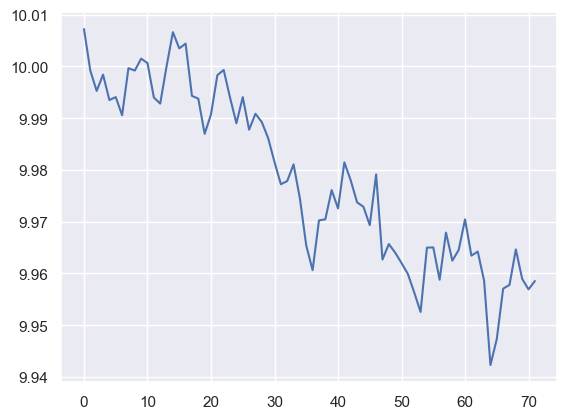

In [7]:
cumsum_vec = np.cumsum(np.insert(loss_history['total'], 0, 0)) 
window_width = 10
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
plt.plot(ma_vec)
plt.show()